ARIMA (AutoRegressive Integrated Moving Average) is a widely used time series forecasting model that combines three components: autoregression (AR), differencing (I), and moving average (MA). It is especially useful for non-seasonal time series data with trends.


Here's a breakdown of each component:


- Autoregression (AR): The autoregression component captures the relationship between an observation and a predefined number of its lagged (previous) values. The order of AR (p) determines how many lagged values are considered. For example, AR(2) uses two previous observations to predict the next value.

- Differencing (I): Differencing is used to make a time series stationary by removing trends and seasonality. Stationary time series have constant mean and variance over time, which is an important assumption for many time series models, including ARIMA. The order of differencing (d) represents the number of times the series is differenced. For example, d = 1 means the first-order difference, which is the difference between consecutive observations.

- Moving Average (MA): The moving average component captures the relationship between an observation and a predefined number of lagged errors (residuals). The order of MA (q) determines how many lagged errors are considered. For example, MA(2) uses the errors from the two previous predictions to predict the next value.

The ARIMA model is defined by the parameters (p, d, q), where:

- p is the order of the autoregressive component (AR)
- d is the order of differencing (I)
- q is the order of the moving average component (MA)

ARIMA models are specifically designed for univariate time series forecasting, which means they are intended for single-variable time series data. 



In [1]:
# -*- coding: utf-8 -*-
# Bitcoin price prediction using ARIMA MODEL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

            Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01 2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02 2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   
2012-01-03 2012-01-03  5.252500  5.252500  5.252500  5.252500     11.004660   
2012-01-04 2012-01-04  5.200000  5.223333  5.200000  5.223333     11.914807   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31         106.330084        4.471603  
2012-01-01          35.259720        4.806667  
2012-01-02          95.240000        5.000000  
2012-01-03          58.100651        5.252500  
2012-01-04          63.119577        5.208159  


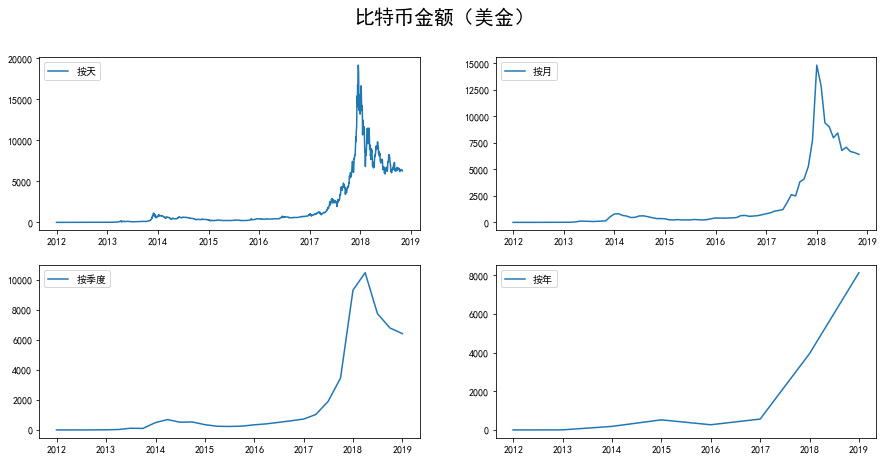

In [2]:
# data loading
df = pd.read_csv(r'D:\workspace\bitcoin\bitcoin_2012-01-01_to_2018-10-31.csv')
# data preprocessing
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# data exploration
print(df.head())

df_month = df.resample('M').mean() 
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean() # change the df to an annual frequency with the year ending in December
# plotting by different time span
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('比特币金额（美金）', fontsize=20)
plt.subplot(221)
# First digit: The number of rows in the subplot grid (2 in this case)
# Second digit: The number of columns in the subplot grid (also 2 in this case)
# Third digit: The index of the current subplot (1 in this case), with indices running from left to right and top to bottom
plt.plot(df.Weighted_Price, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='按年')
plt.legend()
plt.show()

最优模型:                                 SARIMAX Results                                
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -680.761
Date:                Sun, 26 Mar 2023   AIC                           1365.522
Time:                        16:29:25   BIC                           1370.335
Sample:                    12-31-2011   HQIC                          1367.455
                         - 10-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2360      0.035      6.730      0.000       0.167       0.305
sigma2      9.513e+05   4.19e+04     22.684      0.000    8.69e+05    1.03e+06
Ljung-Box (L1) (Q):                   0.06   

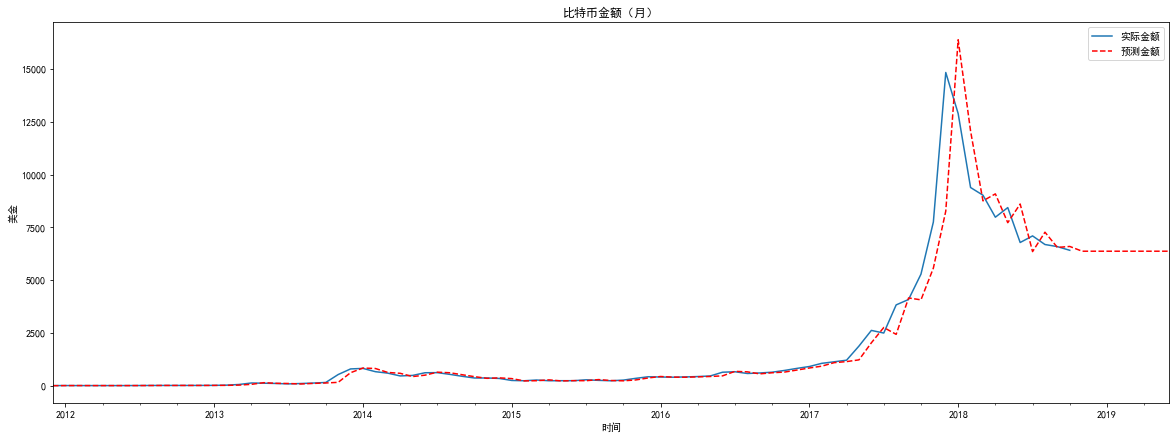

In [3]:
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARIMA(df_month.Weighted_Price,order=(param[0], 1, param[1])).fit()
# param[0]: The order of the autoregressive (AR) component (denoted by p). 
# This represents the number of previous time steps (lags) that are used to predict the current value in the autoregressive part of the model.

# 1: The order of the differencing (I) component (denoted by d). 
# This represents the number of times the time series data is differenced to make it stationary (i.e., constant mean and variance over time). 
# In this case, the time series data is differenced once.

# param[1]: The order of the moving average (MA) component (denoted by q). 
# This represents the number of lagged forecast errors (residuals) used in the moving average part of the model.

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())
# 比特币预测
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31), 
             datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=91)
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()